In [ ]:
conda install cudatoolkit

In [ ]:
conda install numba

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numba 
from numba import cuda
from numba import jit
from numba import njit

In [2]:
@njit
def monte_carlo(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [ ]:
def f(x,r,a,b):##siendo a y b X y Y en coordenandas cartesianas respectivamente
    y = np.sqrt(r**2-x**2+2*a*x-a**2)+b
    return y;  # evaluamos fx

def fm(x,r,a,b):##siendo a y b X y Y en coordenandas cartesianas respectivamente
    y = -(np.sqrt(r**2-x**2+2*a*x-a**2)) + b
    return y;  # evaluamos fx

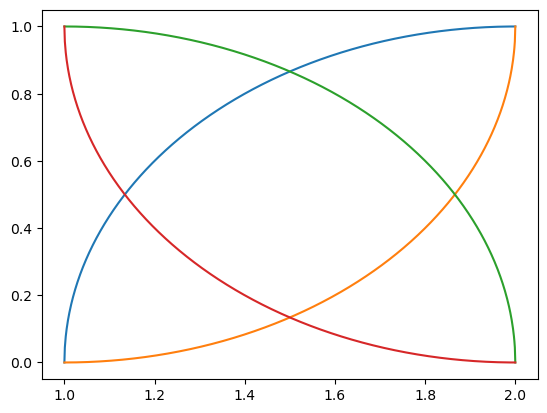

El área es: 0.79


In [51]:
# Graficamos la función
a,b = 1, 2 #ancho
c = 1 #alto

x = np.linspace(1, 2, 1000)  # Rango para la variable x
fx1 = f(x,1,2,0)  # Evaluamos f(x)
fx2 = fm(x,1,1,1)  # Evaluamos f(x)
fx3 = f(x,1,1,0)  # Evaluamos f(x)
fx4 = fm(x,1,2,1)  # Evaluamos f(x)
plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)
plt.show()  # Graficamos x, fx
plt.show()
# Calculamos el área por integración númerica usando la regla del trapecio
# Usamos trapz(y, x) implementada en numpy


# El área es uno, es una función de densidad de probabilidad válida

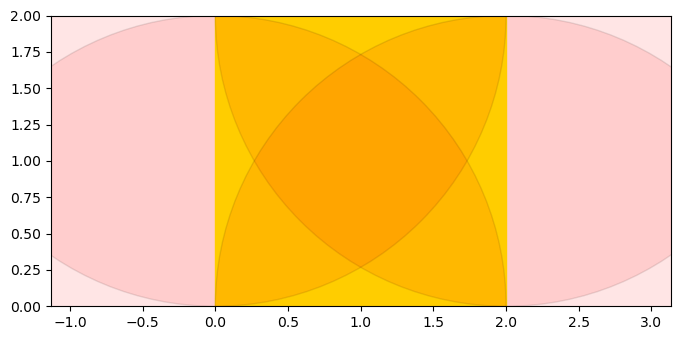

ModuleNotFoundError: No module named 'scipy'